## KNN Approach



### Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

from pathlib import Path
import os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction


2024-04-29 18:57:16.114816: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 18:57:16.161616: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 18:57:16.161649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 18:57:16.163496: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-29 18:57:16.171753: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# read dynamic path
base_dir = Path(os.getcwd())/"implementation"
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [3]:
nn_data_raw = pd.read_csv(data_dir/"ACHE/ache_pca.csv")

nn_data_raw

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,43,44,45,46,47,48,49,50,51,LABEL
0,0,2.775103,1.569092,-1.633093,0.509205,-0.365362,0.464463,-1.344698,0.340212,1.195709,...,0.028038,0.472668,0.000417,0.032610,0.321647,0.373303,0.378937,0.053533,0.146973,active
1,1,1.160143,0.745342,3.626592,-0.482753,-0.501234,-0.702610,0.148980,1.191717,-0.315544,...,0.152880,-0.211698,-0.036652,0.121264,0.091523,0.055746,-0.028294,0.070177,0.144679,active
2,2,1.347487,-1.066134,0.930806,-0.326445,1.909936,0.292744,0.015491,0.427259,0.980201,...,0.217302,-0.109417,0.019410,-0.095346,-0.155197,0.019081,-0.141183,-0.306460,-0.062238,active
3,3,4.217589,-0.574677,1.399565,1.361755,-1.065899,0.487160,0.041603,0.652388,0.670705,...,0.157739,-0.189402,0.158445,0.220310,0.021845,-0.099789,0.070753,0.123486,0.066222,active
4,4,2.269227,-0.097871,0.590080,0.325115,1.649822,0.056987,-0.778049,0.349009,0.760214,...,0.067016,-0.050732,-0.009238,0.209047,-0.014614,-0.088393,0.046919,-0.085897,0.123251,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,998,-0.609818,-0.656158,-0.131409,0.554176,-0.437736,-0.673396,-0.254374,-0.307080,-0.299093,...,-0.102843,0.016278,0.070193,-0.382453,0.163873,-0.657440,-0.134046,0.768515,0.256114,active
999,999,-0.418320,-0.805650,-0.109816,-0.376300,-0.549992,-0.458199,0.583562,0.367584,0.043453,...,-0.086251,-0.012426,0.085909,0.038385,0.079218,0.017346,0.007403,-0.071999,-0.063954,active
1000,1000,-1.637342,-0.955758,0.168724,0.684614,-0.258857,-0.898800,0.085315,0.578703,0.398927,...,-0.576817,0.119175,-0.115178,0.025776,-0.052349,0.095234,0.116501,0.038220,0.091057,active
1001,1001,0.573375,-0.944395,-0.090789,-0.004957,-0.256222,-0.095932,0.025505,-0.122203,0.328594,...,-0.200537,0.019137,-0.007516,0.055282,-0.002256,0.076485,-0.001794,-0.038076,-0.072265,inactive


In [4]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

2024-04-29 18:57:18.928168: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 52        
                                                                 
Total params: 52 (208.00 Byte)
Trainable params: 52 (208.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-04-29 18:57:18.976652: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-29 18:57:18.976782: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-29 18:57:18.982714: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-29 18:57:18.982886: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-29 18:57:18.982915: I external/local_xla/xla/stream_executor

Epoch 1/150


2024-04-29 18:57:23.663283: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-29 18:57:24.225020: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5c384c5a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-29 18:57:24.225065: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-04-29 18:57:24.232807: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-29 18:57:24.255114: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1714409844.351116   11104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


36/36 - 2s - loss: 0.7136 - accuracy: 0.5437 - val_loss: 0.7158 - val_accuracy: 0.5532 - 2s/epoch - 53ms/step
Epoch 2/150
36/36 - 0s - loss: 0.6951 - accuracy: 0.5490 - val_loss: 0.7026 - val_accuracy: 0.6028 - 277ms/epoch - 8ms/step
Epoch 3/150
36/36 - 0s - loss: 0.6774 - accuracy: 0.5668 - val_loss: 0.6903 - val_accuracy: 0.6312 - 262ms/epoch - 7ms/step
Epoch 4/150
36/36 - 0s - loss: 0.6622 - accuracy: 0.5847 - val_loss: 0.6780 - val_accuracy: 0.6241 - 267ms/epoch - 7ms/step
Epoch 5/150
36/36 - 0s - loss: 0.6467 - accuracy: 0.6239 - val_loss: 0.6678 - val_accuracy: 0.6383 - 282ms/epoch - 8ms/step
Epoch 6/150
36/36 - 0s - loss: 0.6328 - accuracy: 0.6435 - val_loss: 0.6575 - val_accuracy: 0.6525 - 270ms/epoch - 8ms/step
Epoch 7/150
36/36 - 0s - loss: 0.6210 - accuracy: 0.6542 - val_loss: 0.6501 - val_accuracy: 0.6525 - 273ms/epoch - 8ms/step
Epoch 8/150
36/36 - 0s - loss: 0.6096 - accuracy: 0.6809 - val_loss: 0.6415 - val_accuracy: 0.6809 - 270ms/epoch - 8ms/step
Epoch 9/150
36/36 - 0s

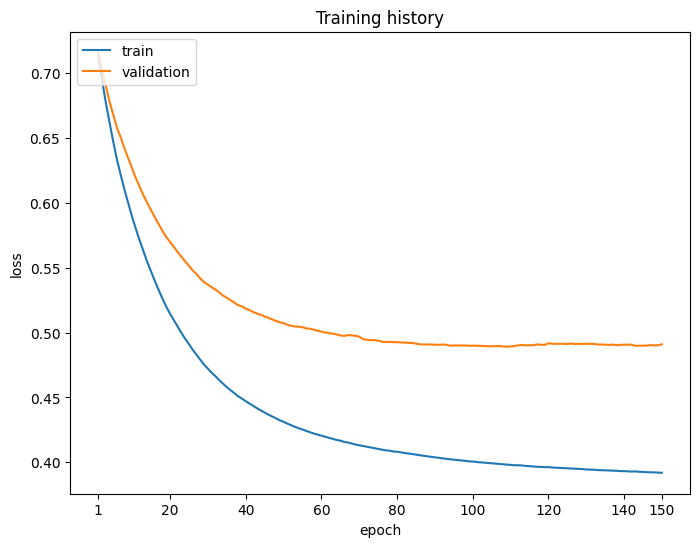

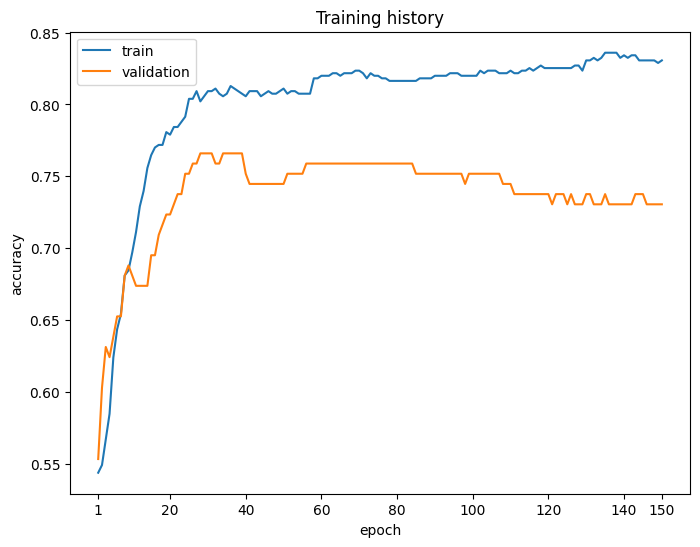

In [7]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

### Evaluate Testdata using model

In [8]:
pred = model.predict(X_test)
classes= [1 if i > 0.5  else 0 for i in pred]


10/10 [==============================] - 1s 12ms/step


### Prepare Data for evaluation

In [9]:
result_df = pd.DataFrame(columns=nn_data_raw.columns[:-1])

for i, row in enumerate(X_test):
    data = [i,i]
    data.extend(row)
    result_df.loc[i+1] = data

result_df["LABEL"] = y_test
result_df["PRED"] = classes

result_df.to_csv(result_dir / "ACHE/fe_pca_nn.csv", encoding="utf-8")